# Plots in the Latest Version of the Manuscript

[![Manuscript Version](https://img.shields.io/badge/version-2.2-red?style=for-the-badge)](https://doi.org/10.1364/JOSAB.483944)
[![Toolbox Version](https://img.shields.io/badge/qom-v1.0.1-red?style=for-the-badge)](https://sampreet.github.io/qom-docs/v1.0.1)

## Dependencies

In [1]:
# dependencies
import numpy as np
import os
import sys

# qom modules
from qom.solvers.deterministic import HLESolver
from qom.solvers.measure import QCMSolver, get_Wigner_distributions_single_mode
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter
from qom.utils.loopers import wrap_looper

# add path to local libraries
sys.path.append(os.path.abspath(os.path.join('../..')))
# import system
from systems.MiddleMembrane import MM_01

# initialize logger
init_log()

MainThread               INFO    2024-01-10 15:00:27.377: (qom.ui.log) -------------------------------------------------Logger Initialized


## Figure 2

Time evolution of the variance in (a) position fluctuation ($Q$) and (b) momentum fluctuation ($P$) with RWA (solid red) and without RWA (solid blue).
The dashed black line denotes the standard quantum limit.
The parameters used are $\Delta = \omega_{m}$, $g = 10^{−4} \omega_{m}$, $Omega_{a} = \Omega_{b} = 2 \omega_{m}$, $\kappa = 0.1 \omega_{m}$, $\gamma = 10^{−6} \omega_{m}$, $a_{0} = 2.0$, $a_{\pm 1} = 0.2$, $b_{0} = 100$, $b_{\pm 1} = 25$, $n_{a} = 0$, and $n_{b} = 10$.

MainThread               INFO    2024-01-10 15:00:27.819: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2024-01-10 15:00:27.855: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	


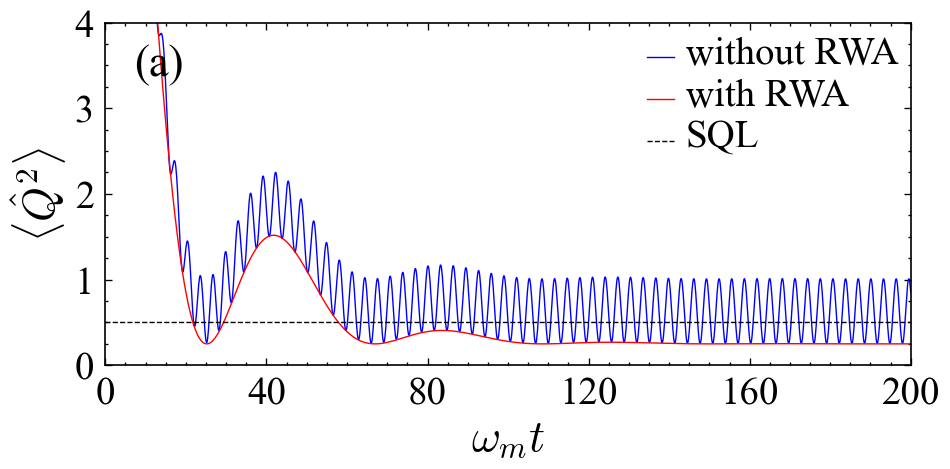

In [2]:
# all parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'ode_method'    : 'vode',
        'indices'       : [(2, 2)],
        't_min'         : 0.0,
        't_max'         : 200.0,
        't_dim'         : 2001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [1.0] * 3,
        'styles'            : ['-', '-', '--'],
        'x_label'           : '$\\omega_{m} t$',
        'x_ticks'           : [i * 40 for i in range(6)],
        'x_ticks_minor'     : [i * 5 for i in range(41)],
        'v_label'           : '$\\langle \\hat{Q}^{2} \\rangle$',
        'v_ticks'           : [i * 1 for i in range(5)],
        'v_ticks_minor'     : [i * 0.25 for i in range(17)],
        'show_legend'       : True,
        'legend_labels'     : ['without RWA', 'with RWA', 'SQL'],
        'legend_location'   : 'upper right',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.14, 0.82)
        }]
    }
}

# initialize logger
init_log()

# initialize system without RWA
params['system']['t_rwa'] = False
system = MM_01(
    params=params['system']
)

# initialize solver
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
# get times and variances
T = hle_solver.get_times()
M_0 = hle_solver.get_corr_indices().transpose()[0]

# initialize system with RWA
params['system']['t_rwa'] = True
system = MM_01(
    params=params['system']
)

# get variances
M_1 = HLESolver(
    system=system,
    params=params['solver']
).get_corr_indices().transpose()[0]

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[M_0, M_1, [0.5] * len(T)],
    xs=T
)
plotter.show()

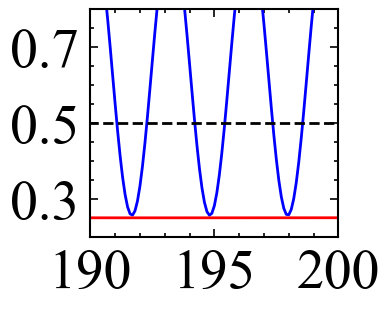

In [3]:
# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'          : 'lines',
        'colors'        : ['b', 'r', 'k'],
        'sizes'         : [2.0] * 3,
        'styles'        : ['-', '-', '--'],
        'x_ticks'       : [190, 195, 200],
        'x_ticks_minor' : [i * 1 + 190 for i in range(11)],
        'v_limits'      : [0.2, 0.8],
        'v_ticks'       : [0.3, 0.5, 0.7],
        'v_ticks_minor' : [i * 0.05 + 0.2 for i in range(13)],
        'tick_font_size': 40,
        'width'         : 4.0,
        'height'        : 3.2
    }
)
plotter.update(
    vs=[M_0, M_1, [0.5] * len(T)],
    xs=T
)
plotter.show()

MainThread               INFO    2024-01-10 15:00:29.914: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2024-01-10 15:00:29.987: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	


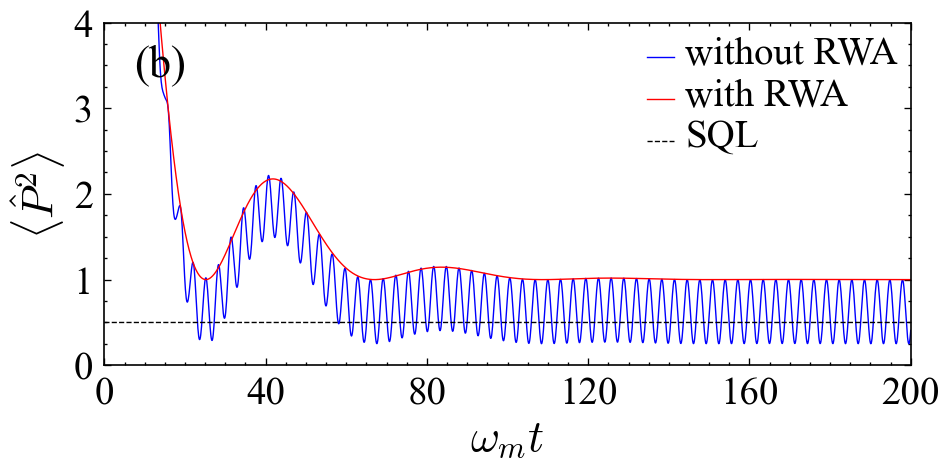

In [4]:
# all parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'ode_method'    : 'vode',
        'indices'       : [(3, 3)],
        't_min'         : 0.0,
        't_max'         : 200.0,
        't_dim'         : 2001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [1.0] * 3,
        'styles'            : ['-', '-', '--'],
        'x_label'           : '$\\omega_{m} t$',
        'x_ticks'           : [i * 40 for i in range(6)],
        'x_ticks_minor'     : [i * 5 for i in range(41)],
        'v_label'           : '$\\langle \\hat{P}^{2} \\rangle$',
        'v_ticks'           : [i * 1 for i in range(5)],
        'v_ticks_minor'     : [i * 0.25 for i in range(17)],
        'show_legend'       : True,
        'legend_labels'     : ['without RWA', 'with RWA', 'SQL'],
        'legend_location'   : 'upper right',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations': [{
            'text'  : '(b)',
            'xy'    : (0.14, 0.82)
        }]
    }
}

# initialize logger
init_log()

# initialize system without RWA
params['system']['t_rwa'] = False
system = MM_01(
    params=params['system']
)

# initialize solver
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
# get times and variances
T = hle_solver.get_times()
M_0 = hle_solver.get_corr_indices().transpose()[0]

# initialize system with RWA
params['system']['t_rwa'] = True
system = MM_01(
    params=params['system']
)

# get variances
M_1 = HLESolver(
    system=system,
    params=params['solver']
).get_corr_indices().transpose()[0]

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[M_0, M_1, [0.5] * len(T)],
    xs=T
)
plotter.show()

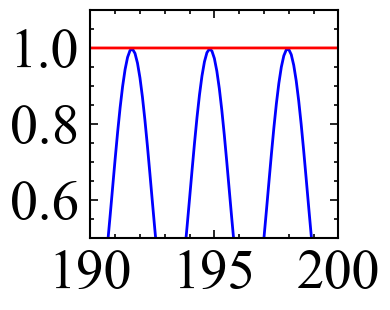

In [5]:
# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'          : 'lines',
        'colors'        : ['b', 'r', 'k'],
        'sizes'         : [2.0] * 3,
        'styles'        : ['-', '-', '--'],
        'x_ticks'       : [190, 195, 200],
        'x_ticks_minor' : [i * 1 + 190 for i in range(11)],
        'v_limits'      : [0.5, 1.1],
        'v_ticks'       : [0.6, 0.8, 1.0],
        'v_ticks_minor' : [i * 0.05 + 0.5 for i in range(13)],
        'width'         : 4.0,
        'height'        : 3.2,
        'tick_font_size': 40
    }
)
plotter.update(
    vs=[M_0, M_1, [0.5] * len(T)],
    xs=T
)
plotter.show()

## Figure 3

Wigner function distribution of the mechanical mode at specific time intervals with and without RWA.
System parameters are the same as in Fig. 2.


MainThread               INFO    2024-01-10 15:00:31.285: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2024-01-10 15:00:40.886: (qom.solvers.measure) -----------------------------------------Measures Obtained	


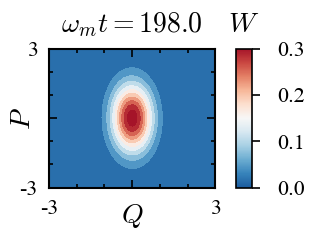

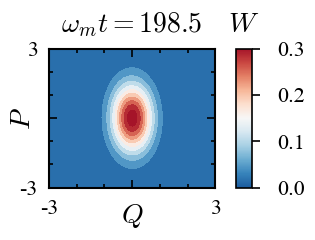

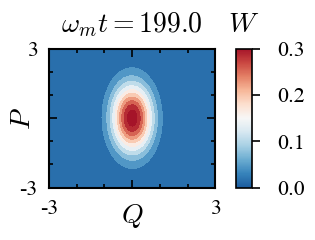

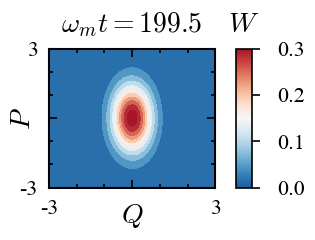

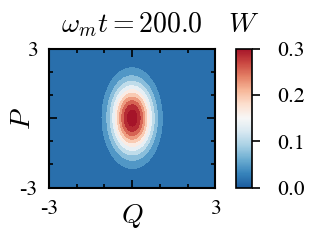

In [6]:
# frequently used variables
_max = 3
_dim = 601

# all parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'ode_method'    : 'vode',
        'indices'       : [1],
        'wigner_xs'     : np.linspace(-_max, _max, _dim),
        'wigner_ys'     : np.linspace(-_max, _max, _dim),
        't_min'         : 0.0,
        't_max'         : 200.0,
        't_dim'         : 2001,
        't_index_min'   : 1980,
        't_index_max'   : 2001,
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'          : 'contourf',
        'x_label'       : '$Q$',
        'x_label_pad'   : -12,
        'x_tick_labels' : [-_max, '', _max],
        'x_ticks'       : [-_max, 0, _max],
        'x_ticks_minor' : [i - _max for i in range(7)],
        'y_label'       : '$P$',
        'y_label_pad'   : -12,
        'y_tick_labels' : [-_max, '', _max],
        'y_ticks'       : [-_max, 0, _max],
        'y_ticks_minor' : [i - _max for i in range(7)],
        'v_ticks'       : [0.0, 0.1, 0.2, 0.3],
        'v_ticks_minor' : [i * 0.05 for i in range(8)],
        'show_cbar'     : True,
        'cbar_title'    : '$W$',
        'cbar_tick_pad' : -2,
        'cbar_ticks'    : [0.0, 0.1, 0.2, 0.3],
        'width'         : 2.75,
        'height'        : 2.5
    }
}

# initialize logger
init_log()

# initialize system with RWA
params['system']['t_rwa'] = True
system = MM_01(
    params=params['system']
)

# get times and correlations
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
T = hle_solver.get_times()
_, Corrs = hle_solver.get_modes_corrs()
# get Wigner distributions
Wigners = get_Wigner_distributions_single_mode(
    Corrs=Corrs,
    params=params['solver']
)

# plotter
for i in range(0, len(T), 5):
    params['plotter']['title'] = '$\\omega_{:} t = {:0.1f}$'.format('m', T[i])
    plotter = MPLPlotter(
        axes={
            'X': np.linspace(-_max, _max, _dim),
            'Y': np.linspace(-_max, _max, _dim)
        },
        params=params['plotter']
    )
    plotter.update(
        vs=Wigners[i, 0]
    )
    plotter.show()

MainThread               INFO    2024-01-10 15:00:50.004: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2024-01-10 15:00:58.992: (qom.solvers.measure) -----------------------------------------Measures Obtained	


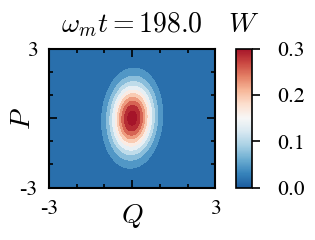

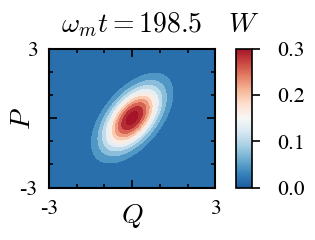

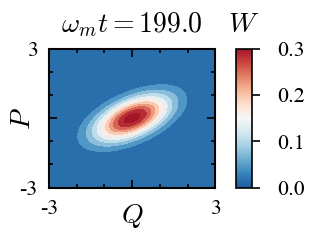

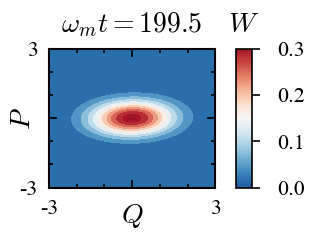

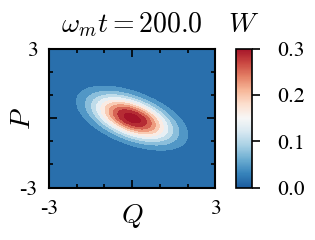

In [7]:
# frequently used variables
_max = 3
_dim = 601

# all parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'ode_method'    : 'vode',
        'indices'       : [1],
        'wigner_xs'     : np.linspace(-_max, _max, _dim),
        'wigner_ys'     : np.linspace(-_max, _max, _dim),
        't_min'         : 0.0,
        't_max'         : 200.0,
        't_dim'         : 2001,
        't_index_min'   : 1980,
        't_index_max'   : 2001,
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'          : 'contourf',
        'x_label'       : '$Q$',
        'x_label_pad'   : -12,
        'x_tick_labels' : [-_max, '', _max],
        'x_ticks'       : [-_max, 0, _max],
        'x_ticks_minor' : [i - _max for i in range(7)],
        'y_label'       : '$P$',
        'y_label_pad'   : -12,
        'y_tick_labels' : [-_max, '', _max],
        'y_ticks'       : [-_max, 0, _max],
        'y_ticks_minor' : [i - _max for i in range(7)],
        'v_ticks'       : [0.0, 0.1, 0.2, 0.3],
        'v_ticks_minor' : [i * 0.05 for i in range(8)],
        'show_cbar'     : True,
        'cbar_title'    : '$W$',
        'cbar_tick_pad' : -2,
        'cbar_ticks'    : [0.0, 0.1, 0.2, 0.3],
        'width'         : 2.75,
        'height'        : 2.5
    }
}

# initialize logger
init_log()

# initialize system without RWA
params['system']['t_rwa'] = False
system = MM_01(
    params=params['system']
)

# get times and correlations
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
T = hle_solver.get_times()
_, Corrs = hle_solver.get_modes_corrs()
# get Wigner distributions
Wigners = get_Wigner_distributions_single_mode(
    Corrs=Corrs,
    params=params['solver']
)

# plotter
for i in range(0, len(T), 5):
    params['plotter']['title'] = '$\\omega_{:} t = {:0.1f}$'.format('m', T[i])
    plotter = MPLPlotter(
        axes={
            'X': np.linspace(-_max, _max, _dim),
            'Y': np.linspace(-_max, _max, _dim)
        },
        params=params['plotter']
    )
    plotter.update(
        vs=Wigners[i, 0]
    )
    plotter.show()

## Figure 4

Behavior of (a) variance in the position quadrature $\langle \tilde{Q}^{2} \rangle$ and (b) occupancy of the Bogoliubov mode $\langle \tilde{\beta}^{\dagger} \tilde{\beta} \rangle$ with variation in the ratio of sideband coupling strengths $G_{1} / G_{0}$ for $n_{b} = 10$ (solid blue) and $n_{b} = 1000$ (solid red).
Here, we have used $( b_{−1} + b_{1} ) \in (0, 225.0]$ to obtain the given range of $G_{1} / G_{0}$ with $\omega_{m} t_{max} = 10^{3}$.
The dotted-dashed lines in (a) represent the corresponding maximum values of squeezing without
RWA.
The dotted black line in (a) denotes the SQL, and the region under the dotted black line in (b)  corresponds to cooling of the Bogoliubov mode $( \langle \tilde{\beta}^{\dagger} \tilde{\beta} \rangle < 1 )$.
Other parameters are the same as in Fig. 2.

MainThread               INFO    2024-01-10 15:01:07.332: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:07.337: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:07.339: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:07.343: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:07.345: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:07.349: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:07.350: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread          

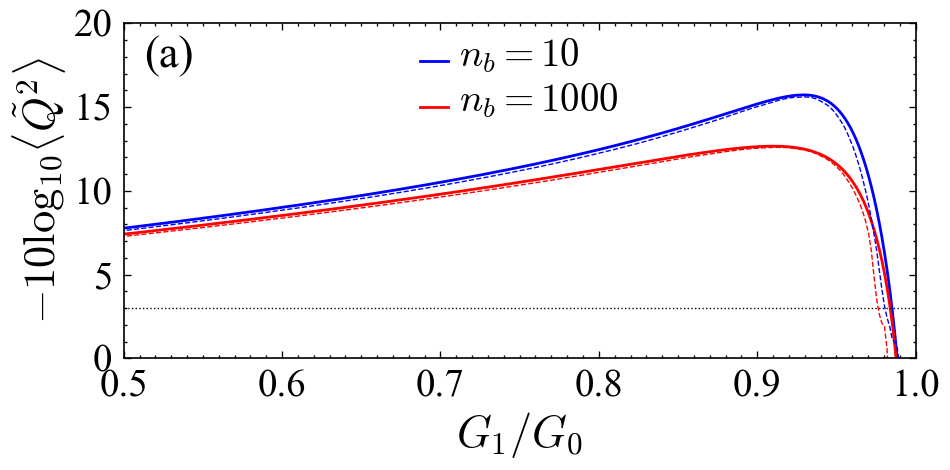

In [8]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'X'             : {
            'var'   : 'beta_pm_sum',
            'min'   : 75,
            'max'   : 225,
            'dim'   : 301
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'ode_method'    : 'vode',
        'indices'       : [(2, 2)],
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_index_min'   : 9371,
        't_index_max'   : 10001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'b', 'r', 'k'],
        'sizes'             : [2.0] * 2 + [1.0] * 3,
        'styles'            : ['-'] * 2 + ['--'] * 2 + [':'],
        'x_label'           : '$G_{1} / G_{0}$',
        'x_ticks'           : [i * 0.1 + 0.5 for i in range(6)],
        'x_ticks_minor'     : [i * 0.01 + 0.5 for i in range(51)],
        'v_label'           : '$- 10 \\mathrm{log}_{10} \\langle \\tilde{Q}^{2} \\rangle$',
        'v_ticks'           : [i * 5 for i in range(5)],
        'v_ticks_minor'     : [i * 1 for i in range(21)],
        'show_legend'       : True,
        'legend_labels'     : [
            '$n_{b} = 10$',
            '$n_{b} = 1000$'
        ],
        'legend_location'   : 'upper center',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.15, 0.84)
        }]
    }
}

# function to calculate the ratio and variance
def func_rat_var(system_params):
    # update parameters
    val = system_params['beta_pm_sum']
    system_params['betas'][1] = val / 2.0
    system_params['betas'][2] = val / 2.0

    # initialize system
    system = MM_01(
        params=system_params
    )

    # get derived constants and controls
    _, _, c = system.get_ivc()
    
    # get squeezing ratio
    rat = system.get_params_ratio(
        c=c
    )

    # get mechanical position variance
    var = np.min(HLESolver(
        system=system,
        params=params['solver']
    ).get_corr_indices()[:, 0])

    # update results
    return np.array([rat, var], dtype=np.float_)

# low thermal phonons with RWA
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/4a_rwa_n=10.0'
params['system']['ns'][1] = 10.0
params['system']['t_rwa'] = True
looper = wrap_looper(
    looper_name='XLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
rats, vars_0_rwa = np.transpose(looper.results['V'])

# high thermal phonons with RWA
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/4a_rwa_n=1000.0'
params['system']['ns'][1] = 1000.0
params['system']['t_rwa'] = True
looper = wrap_looper(
    looper_name='XLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
_, vars_1_rwa = np.transpose(looper.results['V'])

# low thermal phonons without RWA
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/4a_wrwa_n=10.0'
params['system']['ns'][1] = 10.0
params['system']['t_rwa'] = False
looper = wrap_looper(
    looper_name='XLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
_, vars_0_wrwa = np.transpose(looper.results['V'])

# high thermal phonons without RWA
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/4a_wrwa_n=1000.0'
params['system']['ns'][1] = 1000.0
params['system']['t_rwa'] = False
looper = wrap_looper(
    looper_name='XLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
_, vars_1_wrwa = np.transpose(looper.results['V'])

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=- 10 * np.log10([vars_0_rwa, vars_1_rwa, vars_0_wrwa, vars_1_wrwa, [0.5] * len(vars_0_rwa)]),
    xs=rats
)
plotter.show()

MainThread               INFO    2024-01-10 15:01:08.240: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:08.244: (qom.loopers.XLooper) --------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:08.245: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:08.249: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


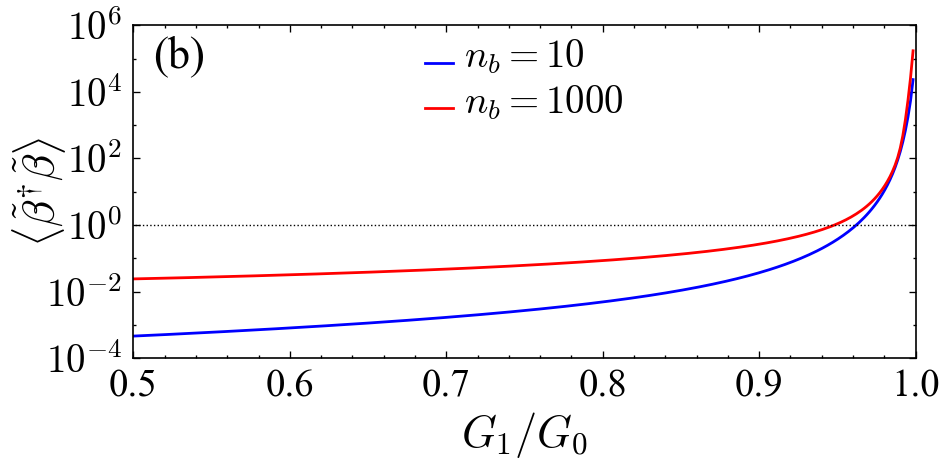

In [9]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'X'             : {
            'var'   : 'beta_pm_sum',
            'min'   : 75,
            'max'   : 225,
            'dim'   : 301
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'ode_method'    : 'vode',
        'indices'       : [(2, 2), (3, 3)],
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_index_min'   : 9371,
        't_index_max'   : 10001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [2.0] * 2 + [1.0],
        'styles'            : ['-', '-', ':'],
        'x_label'           : '$G_{1} / G_{0}$',
        'x_ticks'           : [i * 0.1 + 0.5 for i in range(6)],
        'x_ticks_minor'     : [i * 0.02 + 0.5 for i in range(26)],
        'v_label'           : '$\\langle \\tilde{\\beta}^{\\dagger} \\tilde{\\beta} \\rangle$',
        'v_label_pad'       : -16,
        'v_scale'           : 'log',
        'v_tick_labels'     : ['$10^{' + str(i * 2 - 4) + '}$' for i in range(6)],
        'v_ticks'           : [10**(i * 2 - 4) for i in range(6)],
        'v_ticks_minor'     : [10.0**(i * 2 - 3) for i in range(11)],
        'show_legend'       : True,
        'legend_labels'     : [
            '$n_{b} = 10$',
            '$n_{b} = 1000$'
        ],
        'legend_location'   : 'upper center',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.16, 0.84)
        }]
    }
}

# function to calculate the ratio and variance
def func_rat_n_beta(system_params):
    # update parameters
    val = system_params['beta_pm_sum']
    system_params['betas'][1] = val / 2.0
    system_params['betas'][2] = val / 2.0

    # initialize system
    system = MM_01(
        params=system_params
    )

    # get derived constants and controls
    _, _, c = system.get_ivc()
    
    # get squeezing ratio
    rat = system.get_params_ratio(
        c=c
    )

    # get mechanical position and momentum variances
    var_q, var_p = np.min(HLESolver(
        system=system,
        params=params['solver']
    ).get_corr_indices(), axis=0)

    # calculate hyperbolic angles
    r = np.arctanh(rat)
    chr = np.cosh(r)
    shr = np.sinh(r)

    # get phonon number in the Bogoluibov mode
    n_beta = (chr**2 + shr**2) * (var_q + var_p - 1) / 2.0 + shr**2 + chr * shr * (var_q - var_p)

    # update results
    return np.array([rat, n_beta], dtype=np.float_)

# low thermal phonons
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/4b_n=10.0'
params['system']['ns'][1] = 10.0
looper = wrap_looper(
    looper_name='XLooper',
    func=func_rat_n_beta,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
rats, n_betas_0 = np.transpose(looper.results['V'])

# high thermal phonons
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/4b_n=1000.0'
params['system']['ns'][1] = 1000.0
looper = wrap_looper(
    looper_name='XLooper',
    func=func_rat_n_beta,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
_, n_betas_1 = np.transpose(looper.results['V'])

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[n_betas_0, n_betas_1, [1.0] * len(n_betas_0)],
    xs=rats
)
plotter.show()

## Figure 5

(a) Squeezing in the position quadrature and (b) optimal sideband ratios plotted with variation in the decay rate $\kappa$ for $n_{b} = 10$ (solid blue) and $n_{b} = 1000$ (solid red) with $\omega_{m} t_{max} = 10^{4}$.
Other parameters are same as in Fig. 2.

MainThread               INFO    2024-01-10 15:01:08.940: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:09.077: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:09.107: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:09.155: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


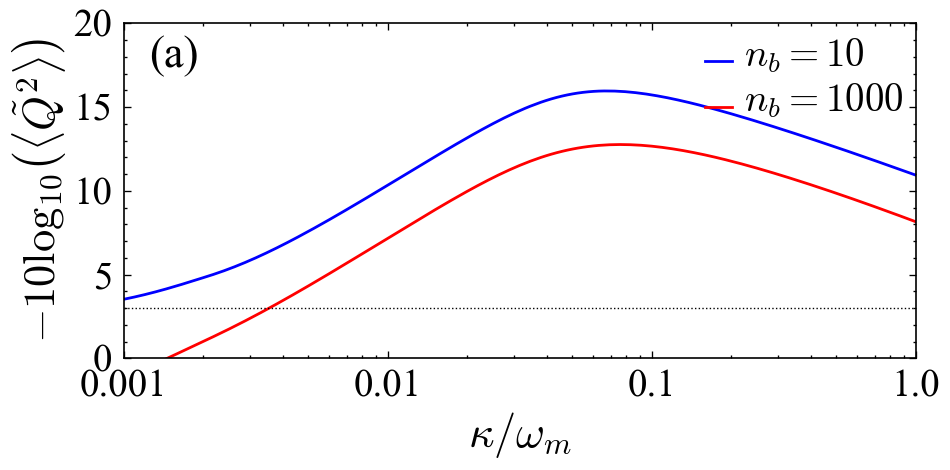

In [10]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'X'             : {
            'var'   : 'beta_pm_sum',
            'min'   : 75,
            'max'   : 225,
            'dim'   : 301
        },
        'Y'             : {
            'var'   : 'kappa_norm',
            'min'   : 1e-3,
            'max'   : 1e0,
            'dim'   : 151,
            'scale' : 'log'
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'ode_method'    : 'vode',
        'indices'       : [(2, 2)],
        't_min'         : 0.0,
        't_max'         : 10000.0,
        't_dim'         : 100001,
        't_index_min'   : 99371,
        't_index_max'   : 100001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [2.0] * 2 + [1.0],
        'styles'            : ['-'] * 2 + [':'],
        'x_label'           : '$\\kappa / \\omega_{m}$',
        'x_ticks'           : [10**(i - 3) for i in range(4)],
        'x_ticks_minor'     : sum([[10**(i - 3) * (j + 2) for i in range(3)] for j in range(8)], []),
        'x_scale'           : 'log',
        'y_name'            : '$n_{b}$',
        'v_label'           : '$- 10 \\mathrm{log}_{10} \\left( \\langle \\tilde{Q}^{2} \\rangle \\right)$',
        'v_ticks'           : [i * 5 for i in range(5)],
        'v_ticks_minor'     : [i * 1 for i in range(21)],
        'show_legend'       : True,
        'legend_labels'     : [
            '$n_{b} = 10$',
            '$n_{b} = 1000$'
        ],
        'legend_location'   : 'upper right',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.155, 0.84)
        }]
    }
}

# function to calculate the ratio and variances
def func_rat_var(system_params):
    # update parameters
    val = system_params['beta_pm_sum']
    system_params['betas'][1] = val / 2.0
    system_params['betas'][2] = val / 2.0

    # initialize system
    system = MM_01(
        params=system_params
    )

    # get derived constants and controls
    _, _, c = system.get_ivc()
    
    # get squeezing ratio
    rat = system.get_params_ratio(
        c=c
    )

    # get mechanical position variances
    var = np.min(HLESolver(
        system=system,
        params=params['solver']
    ).get_corr_indices(), axis=0)[0]

    # update results
    return np.array([rat, var], dtype=np.float_)

# low thermal phonons
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/5_n=10.0'
params['system']['ns'][1] = 10.0
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
xs = looper.axes['Y']['val']
_, vs_0 = np.min(looper.results['V'], axis=1).transpose()

# high thermal phonons
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/5_n=1000.0'
params['system']['ns'][1] = 1000.0
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
_, vs_1 = np.min(looper.results['V'], axis=1).transpose()

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=- 10 * np.log10([vs_0, vs_1, [0.5] * len(vs_0)]),
    xs=xs
)
plotter.show()

MainThread               INFO    2024-01-10 15:01:09.930: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:10.065: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:10.124: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:10.166: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


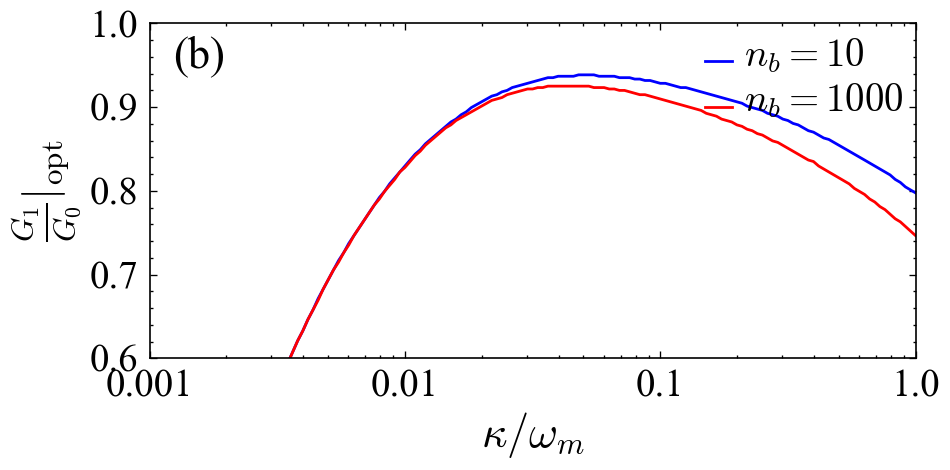

In [11]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'X'             : {
            'var'   : 'beta_pm_sum',
            'min'   : 75,
            'max'   : 225,
            'dim'   : 301
        },
        'Y'             : {
            'var'   : 'kappa_norm',
            'min'   : 1e-3,
            'max'   : 1e0,
            'dim'   : 151,
            'scale' : 'log'
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'ode_method'    : 'vode',
        'indices'       : [(2, 2)],
        't_min'         : 0.0,
        't_max'         : 10000.0,
        't_dim'         : 100001,
        't_index_min'   : 99371,
        't_index_max'   : 100001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [2.0] * 2 + [1.0],
        'styles'            : ['-'] * 2 + [':'],
        'x_label'           : '$\\kappa / \\omega_{m}$',
        'x_ticks'           : [10**(i - 3) for i in range(4)],
        'x_ticks_minor'     : sum([[10**(i - 3) * (j + 2) for i in range(3)] for j in range(8)], []),
        'x_scale'           : 'log',
        'y_name'            : '$n_{b}$',
        'v_label'           : '$\\frac{G_{1}}{G_{0}} |_{\\mathrm{opt}}$',
        'v_ticks'           : [0.6, 0.7, 0.8, 0.9, 1.0],
        'v_ticks_minor'     : [i * 0.02 + 0.6 for i in range(21)],
        'show_legend'       : True,
        'legend_labels'     : [
            '$n_{b} = 10$',
            '$n_{b} = 1000$'
        ],
        'legend_location'   : 'upper right',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.18, 0.84)
        }]
    }
}

# function to calculate the ratio and variances
def func_rat_var(system_params):
    # update parameters
    val = system_params['beta_pm_sum']
    system_params['betas'][1] = val / 2.0
    system_params['betas'][2] = val / 2.0

    # initialize system
    system = MM_01(
        params=system_params
    )

    # get derived constants and controls
    _, _, c = system.get_ivc()
    
    # get squeezing ratio
    rat = system.get_params_ratio(
        c=c
    )

    # get mechanical position variances
    var = np.min(HLESolver(
        system=system,
        params=params['solver']
    ).get_corr_indices()[:, 0])

    # update results
    return np.array([rat, var], dtype=np.float_)

# low thermal phonons
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/5_n=10.0'
params['system']['ns'][1] = 10.0
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
xs = looper.axes['Y']['val']
_, _idxs_0 = np.argmin(looper.results['V'], axis=1).transpose()
vs_0 = np.transpose(looper.results['V'])[0, _idxs_0, 0]

# high thermal phonons
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/5_n=1000.0'
params['system']['ns'][1] = 1000.0
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_var,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
_, _idxs_1 = np.argmin(looper.results['V'], axis=1).transpose()
vs_1 = np.transpose(looper.results['V'])[0, _idxs_1, 0]

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[vs_0, vs_1],
    xs=xs
)
plotter.show()

## Figure 6

(a) Behavior of maximum squeezing in the position quadrature $\langle \tilde{Q}^{2} \rangle$ with variation in the ratio $G_{1} / G_{0}$ for $n_{b} = 10$ obtained using the approximated analytical solution Eq. (17) (solid blue) and the exact numerical solution Eq. (20) (solid red).
The black dots represent the values of maximum squeezing obtained by solving the dynamical equations with $\omega_{m} t_{max} = 10^{3}$.
(b) Comparison of the analytical (solid blue) and numerical (solid red) solutions with time evolution in the presence (solid black) and absence (dotted-dashed black) of RWA.
The dotted black lines denote the SQL.
Other parameters are the same as in Fig. 4.

MainThread               INFO    2024-01-10 15:01:10.979: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:10.983: (qom.loopers.XLooper) --------------------------------------------Results Loaded	


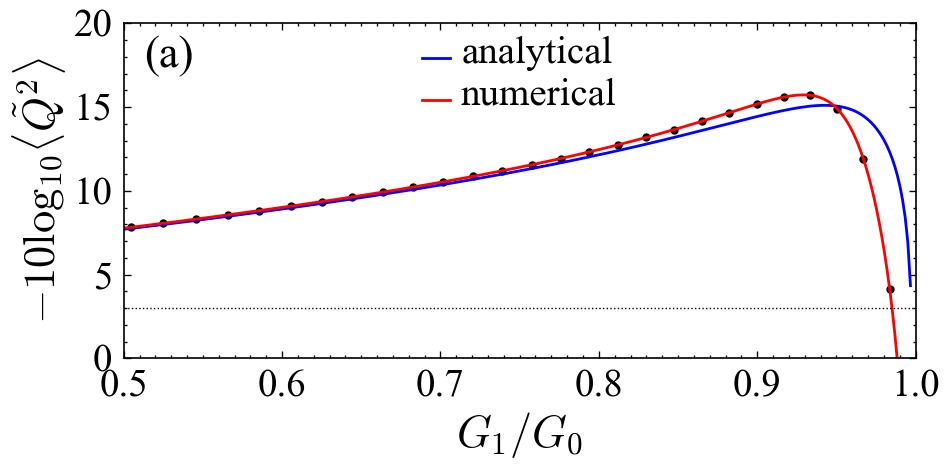

In [12]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v2.2_qom-v1.0.1/6a',
        'X'                 : {
            'var'   : 'beta_pm_sum',
            'min'   : 75,
            'max'   : 225,
            'dim'   : 301
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : False,
        'ode_method'    : 'vode',
        'indices'       : [(2, 2)],
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_index_min'   : 9371,
        't_index_max'   : 10001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [2.0] * 2 + [1.0],
        'styles'            : ['-'] * 2 + [':'],
        'x_label'           : '$G_{1} / G_{0}$',
        'x_ticks'           : [i * 0.1 + 0.5 for i in range(6)],
        'x_ticks_minor'     : [i * 0.01 + 0.5 for i in range(51)],
        'v_label'           : '$- 10 \\mathrm{log}_{10} \\langle \\tilde{Q}^{2} \\rangle$',
        'v_ticks'           : [i * 5 for i in range(5)],
        'v_ticks_minor'     : [i * 1 for i in range(21)],
        'show_legend'       : True,
        'legend_labels'     : ['analytical', 'numerical'],
        'legend_location'   : 'upper center',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.15, 0.84)
        }]
    }
}

# function to calculate the ratio and variance
def func_rat_vars(system_params):
    # update parameters
    val = system_params['beta_pm_sum']
    system_params['betas'][1] = val / 2.0
    system_params['betas'][2] = val / 2.0

    # initialize system
    system = MM_01(
        params=system_params
    )

    # get derived constants and controls
    _, _, c = system.get_ivc()
    
    # get squeezing ratio
    rat = system.get_params_ratio(
        c=c
    )

    # get mechanical position variances
    var = np.mean(HLESolver(
        system=system,
        params=params['solver']
    ).get_corr_indices()[:, 0])

    # get steady state variance
    var_ss = system.get_var_Q_ss_rwa(
        c=c
    )

    # get variance from FT
    var_ft = system.get_var_Q_ft_rwa(
        c=c
    )

    # update results
    return np.array([rat, var, var_ss, var_ft], dtype=np.float_)

# looper
looper = wrap_looper(
    looper_name='XLooper',
    func=func_rat_vars,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
rats, vars, vars_ss, vars_ft = np.transpose(looper.results['V'])

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=- 10 * np.log10([vars_ss, vars_ft, [0.5] * len(vars_ss)]),
    xs=rats
)
plotter.add_scatter(
    vs=- 10 * np.log10(vars[::10]),
    xs=rats[::10],
    color='k',
    size=100,
    style='.'
)
plotter.show()

MainThread               INFO    2024-01-10 15:01:13.351: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	
MainThread               INFO    2024-01-10 15:01:13.849: (qom.solvers.HLESolver) ----------------------------------------Results Obtained	


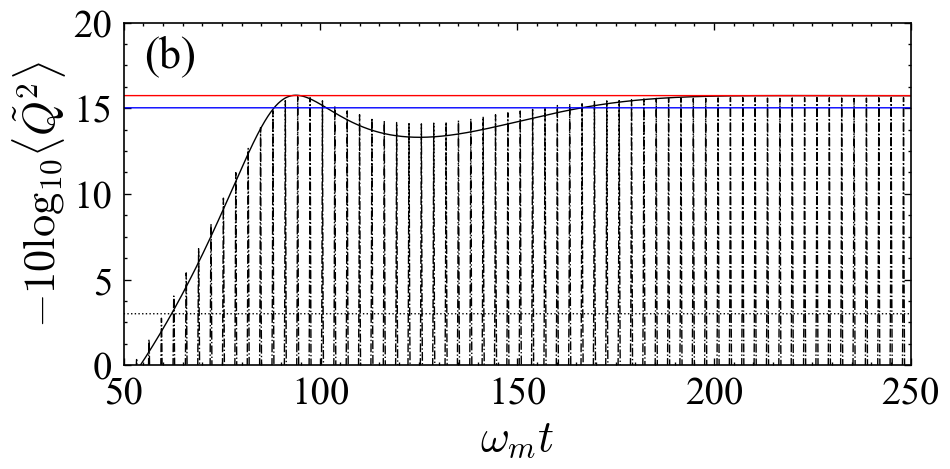

In [13]:
# frequently used variables
rat = 0.93
beta_sum = (400 * rat - 40.0) / (2.0 - 0.4 * rat)

# all parameters
params = {
    'solver': {
        'show_progress' : True,
        'cache'         : False,
        'ode_method'    : 'vode',
        'indices'       : [(2, 2)],
        't_min'         : 0.0,
        't_max'         : 250.0,
        't_dim'         : 25001,
        't_index_min'   : 5000,
        't_index_max'   : 25001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, beta_sum / 2.0, beta_sum / 2.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['k', 'k', 'k', 'b', 'r'],
        'sizes'             : [1.0] * 5,
        'styles'            : ['-.', '-', ':', '-', '-'],
        'x_label'           : '$\\omega_{m} t$',
        'x_ticks'           : [i * 50 + 50 for i in range(5)],
        'x_ticks_minor'     : [i * 5 + 50 for i in range(41)],
        'v_label'           : '$- 10 \\mathrm{log}_{10} \\langle \\tilde{Q}^{2} \\rangle$',
        'v_ticks'           : [i * 5 for i in range(5)],
        'v_ticks_minor'     : [i * 1.25 for i in range(17)],
        'label_font_size'   : 32,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.15, 0.84)
        }]
    }
}

# initialize logger
init_log()

# initialize system without RWA
params['system']['t_rwa'] = False
system = MM_01(
    params=params['system']
)
# initialize solver
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
# get times and mechanical position variances
T = hle_solver.get_times()
M_0 = hle_solver.get_corr_indices().transpose()[0]

# initialize system with RWA
params['system']['t_rwa'] = True
system = MM_01(
    params=params['system']
)
# initialize solver
hle_solver = HLESolver(
    system=system,
    params=params['solver']
)
# get mechanical position variances
M_1 = hle_solver.get_corr_indices().transpose()[0]

# get SQL
M_2 = [0.5] * len(T)

# frequently used variables
_, _, c = system.get_ivc()

# get analytical value
M_3 = [system.get_var_Q_ss_rwa(
    c=c
)] * len(T)

# get numerical value
M_4 = [system.get_var_Q_ft_rwa(
    c=c
)] * len(T)

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=- 10 * np.log10([M_0, M_1, M_2, M_3, M_4]),
    xs=T
)
plotter.show()

## Figure 7

(a) Maximum squeezing in the position quadrature $−10 \log_{10} ( \langle \tilde{Q}^{2} \rangle )$ and (b) maximum observed entanglement between optical and mechanical modes $E_{N_{max}}$ with varying occupancy of the mechanical mode nb for $\kappa \in \{0.1, 1.0\} \omega_{m}$ at optimal values of $G_{1} / G_{0}$ for $\omega_{m} t_{max} = 10^{3}$.
The dotted black line in (a) denotes the SQL.
Other parameters are the same as in Fig. 2.

MainThread               INFO    2024-01-10 15:01:14.982: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:15.007: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:15.024: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:15.167: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


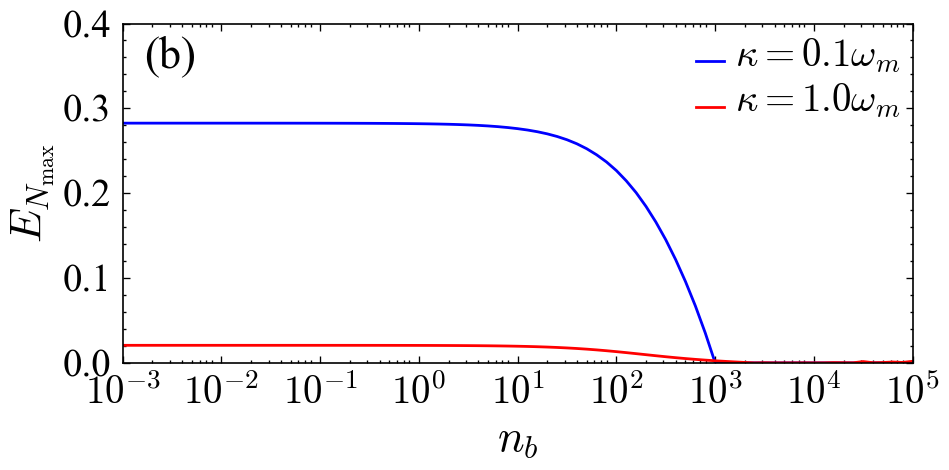

In [14]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'X'             : {
            'var'   : 'beta_pm_sum',
            'min'   : 75.0,
            'max'   : 225.0,
            'dim'   : 301
        },
        'Y'             : {
            'var'   : 'ns',
            'idx'   : 1,
            'min'   : 1e-3,
            'max'   : 1e5,
            'dim'   : 81,
            'scale' : 'log'
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'ode_method'    : 'vode',
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 1),
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_index_min'   : 9371,
        't_index_max'   : 10001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [2.0] * 2 + [1.0],
        'styles'            : ['-'] * 2 + [':'],
        'x_label'           : '$n_{b}$',
        'x_tick_labels'     : ['$10^{' + str(i - 3) + '}$' for i in range(9)],
        'x_ticks'           : [10**(i - 3) for i in range(9)],
        'x_ticks_minor'     : sum([[10**(i - 3) * (j + 2) for i in range(8)] for j in range(7)], []),
        'x_scale'           : 'log',
        'v_label'           : '$E_{N_{\\mathrm{max}}}$',
        'v_tick_labels'     : ['{:0.1f}'.format(i * 0.1) for i in range(5)],
        'v_ticks'           : [i * 0.1 for i in range(5)],
        'v_ticks_minor'     : [i * 0.02 for i in range(21)],
        'show_legend'       : True,
        'legend_labels'     : [
            '$\\kappa = 0.1 \\omega_{m}$',
            '$\\kappa = 1.0 \\omega_{m}$'
        ],
        'legend_location'   : 'upper right',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.15, 0.84)
        }]
    }
}

# function to calculate the ratio and entanglement
def func_rat_entan_ln(system_params):
    # update parameters
    val = system_params['beta_pm_sum']
    system_params['betas'][1] = val / 2.0
    system_params['betas'][2] = val / 2.0

    # initialize system
    system = MM_01(
        params=system_params
    )

    # get derived constants and controls
    _, _, c = system.get_ivc()
    
    # get squeezing ratio
    rat = system.get_params_ratio(
        c=c
    )

    # get modes, correlations and times
    Modes, Corrs = HLESolver(
        system=system,
        params=params['solver']
    ).get_modes_corrs()
    # get entanglement
    eln = np.mean(QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures(), axis=0)[0]

    return np.array([rat, eln])

# low kappa
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/7b_kappa=0.1'
params['system']['kappa_norm'] = 0.1
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_entan_ln,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
xs = looper.axes['Y']['val']
elns_0 = np.max(looper.results['V'], axis=1).transpose()[1]

# high kappa
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/7b_kappa=1.0'
params['system']['kappa_norm'] = 1.0
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_entan_ln,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
elns_1 = np.max(looper.results['V'], axis=1).transpose()[1]

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[elns_0, elns_1],
    xs=xs
)
plotter.show()

MainThread               INFO    2024-01-10 15:01:16.224: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:16.347: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	
MainThread               INFO    2024-01-10 15:01:16.366: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-10 15:01:16.391: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


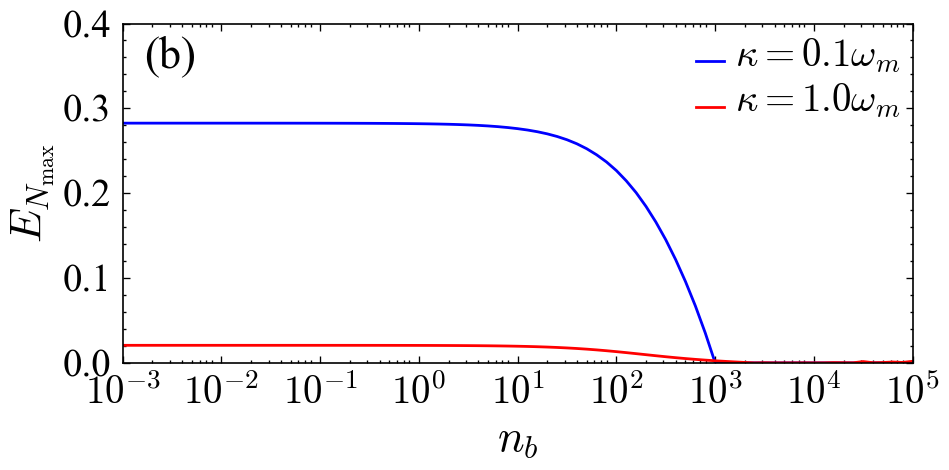

In [15]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'X'             : {
            'var'   : 'beta_pm_sum',
            'min'   : 75.0,
            'max'   : 225.0,
            'dim'   : 301
        },
        'Y'             : {
            'var'   : 'ns',
            'idx'   : 1,
            'min'   : 1e-3,
            'max'   : 1e5,
            'dim'   : 81,
            'scale' : 'log'
        }
    },
    'solver': {
        'show_progress' : False,
        'cache'         : True,
        'ode_method'    : 'vode',
        'measure_codes' : ['entan_ln'],
        'indices'       : (0, 1),
        't_min'         : 0.0,
        't_max'         : 1000.0,
        't_dim'         : 10001,
        't_index_min'   : 9371,
        't_index_max'   : 10001
    },
    'system': {
        'alphas'        : [2.0, 0.2, 0.2],
        'betas'         : [100.0, 25.0, 25.0],
        'Delta_norm'    : 1.0,
        'g_norm'        : 1e-4,
        'gamma_norm'    : 1e-6,
        'kappa_norm'    : 0.1,
        'ns'            : [0.0, 10.0],
        'Omega_norms'   : [2.0, 2.0],
        't_rwa'         : True
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r', 'k'],
        'sizes'             : [2.0] * 2 + [1.0],
        'styles'            : ['-'] * 2 + [':'],
        'x_label'           : '$n_{b}$',
        'x_tick_labels'     : ['$10^{' + str(i - 3) + '}$' for i in range(9)],
        'x_ticks'           : [10**(i - 3) for i in range(9)],
        'x_ticks_minor'     : sum([[10**(i - 3) * (j + 2) for i in range(8)] for j in range(7)], []),
        'x_scale'           : 'log',
        'v_label'           : '$E_{N_{\\mathrm{max}}}$',
        'v_tick_labels'     : ['{:0.1f}'.format(i * 0.1) for i in range(5)],
        'v_ticks'           : [i * 0.1 for i in range(5)],
        'v_ticks_minor'     : [i * 0.02 for i in range(21)],
        'show_legend'       : True,
        'legend_labels'     : [
            '$\\kappa = 0.1 \\omega_{m}$',
            '$\\kappa = 1.0 \\omega_{m}$'
        ],
        'legend_location'   : 'upper right',
        'label_font_size'   : 32,
        'legend_font_size'  : 28,
        'tick_font_size'    : 28,
        'width'             : 9.6,
        'height'            : 4.8,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.15, 0.84)
        }]
    }
}

# function to calculate the ratio and entanglement
def func_rat_entan_ln(system_params):
    # update parameters
    val = system_params['beta_pm_sum']
    system_params['betas'][1] = val / 2.0
    system_params['betas'][2] = val / 2.0

    # initialize system
    system = MM_01(
        params=system_params
    )

    # get derived constants and controls
    _, _, c = system.get_ivc()
    
    # get squeezing ratio
    rat = system.get_params_ratio(
        c=c
    )

    # get modes, correlations and times
    Modes, Corrs = HLESolver(
        system=system,
        params=params['solver']
    ).get_modes_corrs()
    # get entanglement
    eln = np.mean(QCMSolver(
        Modes=Modes,
        Corrs=Corrs,
        params=params['solver']
    ).get_measures(), axis=0)[0]

    return np.array([rat, eln])

# low kappa
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/7b_kappa=0.1'
params['system']['kappa_norm'] = 0.1
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_entan_ln,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
xs = looper.axes['Y']['val']
elns_0 = np.max(looper.results['V'], axis=1).transpose()[1]

# high kappa
params['looper']['file_path_prefix'] = '../../data/v2.2_qom-v1.0.1/7b_kappa=1.0'
params['system']['kappa_norm'] = 1.0
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_rat_entan_ln,
    params=params['looper'],
    params_system=params['system'],
    plot=False
)
elns_1 = np.max(looper.results['V'], axis=1).transpose()[1]

# plotter
plotter = MPLPlotter(
    axes={},
    params=params['plotter']
)
plotter.update(
    vs=[elns_0, elns_1],
    xs=xs
)
plotter.show()